In [26]:
import tslearn
import numpy as np

In [27]:
import pandas as pd

In [28]:
df_input = pd.read_csv('dataset.csv',header=None)
np_input = df_input.values
print(np_input[0][:].shape)

(409,)


In [29]:
from tslearn.utils import to_time_series_dataset
number_of_stations= np_input.shape[0]
number_of_timesteps =  (int)((np_input.shape[1]-1 )/2)
number_of_features = 2 # min max
X_train = np.zeros(( number_of_stations, number_of_timesteps,  number_of_features  ))
for i in range(number_of_stations):     #np_input.shape[0]):
    
    time_steps = (int)((np_input.shape[1]-1 )/2)
#     print(time_steps)
    ts = np.zeros(( time_steps , 2 ))
    for j in range(1,np_input.shape[1],2):
        [mi,ma] = [ np_input[i][j],np_input[i][j+1] ]
        ts[(int)((j-1)/2)] = [mi,ma]
#     print(ts.shape)
    X_train[i] = ts
    
print(X_train.shape)


(32, 204, 2)


In [30]:
# removing outlie station
subset = [i for i in range(32) if i not in [18,26]]
print(subset)
print(X_train[subset].shape)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31]
(30, 204, 2)


In [20]:
from tslearn.clustering import TimeSeriesKMeans
km = TimeSeriesKMeans(n_clusters=6, metric="dtw",max_iter = 900,tol = 1e-08,random_state= 1)
km.fit(X_train)

TimeSeriesKMeans(dtw_inertia=False, init='k-means++', max_iter=900,
                 max_iter_barycenter=100, metric='dtw', metric_params=None,
                 n_clusters=6, n_init=1, n_jobs=None, random_state=1, tol=1e-08,
                 verbose=0)

In [21]:
predictions = km.predict(X_train)

In [22]:

#To find distribution of clusters
for k in range(6):
    c_0 = np.argwhere(predictions==k)
    print(k,c_0.shape[0])

0 6
1 22
2 1
3 1
4 1
5 1


In [19]:
print(km.random_state)

None


In [31]:
from scipy.spatial.distance import cdist 
distortions = [] 
inertias = [] 
mapping1 = {}   # Used for distortion calculation, didnt use
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
#     kmeanModel = KMeans(n_clusters=k).fit(X) 
    km = TimeSeriesKMeans(n_clusters=k, metric="dtw",max_iter = 900,tol = 1e-08)
    km.fit(X_train[subset])     
      
    inertias.append(km.inertia_) 
    
  
    print(km.inertia_)
    mapping2[k] = km.inertia_ 

2104754.7311045877
1991131.6739065878
1234589.733989872
815977.8347458645
766090.118229817
635800.017390531
537037.8146136784
495752.5184577896
431836.25266690156


In [32]:

for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 

1 : 2104754.7311045877
2 : 1991131.6739065878
3 : 1234589.733989872
4 : 815977.8347458645
5 : 766090.118229817
6 : 635800.017390531
7 : 537037.8146136784
8 : 495752.5184577896
9 : 431836.25266690156


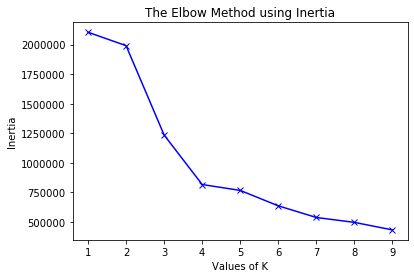

In [33]:
import matplotlib.pyplot as plt 
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [134]:
#-------------------------------------------------------------------------

In [37]:
for rs in range(12,13):
    km = TimeSeriesKMeans(n_clusters=4, metric="dtw",max_iter = 900,tol = 1e-08,random_state= rs)
    km.fit(X_train[subset])
    predictions = km.predict(X_train[subset])
    print("rs",rs,sep=":")
    for k in range(4):
        c_0 = np.argwhere(predictions==k)
        print(k,c_0,sep=',')

rs:12
0,[[ 0]
 [ 1]
 [ 2]
 [ 4]
 [ 5]
 [ 9]
 [11]
 [12]
 [16]
 [18]
 [22]
 [23]
 [28]
 [29]]
1,[[27]]
2,[[21]]
3,[[ 3]
 [ 6]
 [ 7]
 [ 8]
 [10]
 [13]
 [14]
 [15]
 [17]
 [19]
 [20]
 [24]
 [25]
 [26]]


In [40]:
for k in range(4):
    c_0 = np.argwhere(predictions==k)
    print(k,c_0,sep=',')

0,[[ 0]
 [ 1]
 [ 2]
 [ 4]
 [ 5]
 [ 9]
 [11]
 [12]
 [16]
 [18]
 [22]
 [23]
 [28]
 [29]]
1,[[27]]
2,[[21]]
3,[[ 3]
 [ 6]
 [ 7]
 [ 8]
 [10]
 [13]
 [14]
 [15]
 [17]
 [19]
 [20]
 [24]
 [25]
 [26]]


In [ ]:
print("we decide on cluster size 6 rs : 12")

{'Sonia Vihar, Delhi - DPCC': (28.710508, 77.24948499999999), 'Vivek Vihar, Delhi - DPCC': (28.672341999999997, 77.31526), 'Okhla Phase-2, Delhi - DPCC': (28.530784999999998, 77.27125500000001), 'NSIT Dwarka, Delhi - CPCB': (28.609090000000002, 77.03254129999999), 'Jawaharlal Nehru Stadium, Delhi - DPCC': (28.58028, 77.233829), 'Ashok Vihar, Delhi - DPCC': (28.695381, 77.181665), 'Anand Vihar, Delhi - DPCC': (28.646835, 77.31603199999999), 'Mundka, Delhi - DPCC': (28.684678, 77.076574), 'Narela, Delhi - DPCC': (28.822836, 77.10198100000001), 'Sri Aurobindo Marg, Delhi - DPCC': (28.531346000000003, 77.190156), 'Patparganj, Delhi - DPCC': (28.623748, 77.287205), 'Alipur, Delhi - DPCC': (28.815329, 77.15301), 'Mandir Marg, Delhi - DPCC': (28.636428999999996, 77.20106700000001), 'Nehru Nagar, Delhi - DPCC': (28.567890000000002, 77.25051500000001), 'Dr. Karni Singh Shooting Range, Delhi - DPCC': (28.498571000000002, 77.26484), 'Bawana, Delhi - DPCC': (28.7762, 77.051074), 'Pusa, Delhi - IMD